<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# DBSCAN vs. K-Means

_Author: Katie Sylvia_
 
 In **Unsupervised Learning** we have different type of algorithms such as:
 
1. Clustering
2. PCA
2. Association Rules
3. Recommendation Engines


In **Clustering** we have talked about:
1. K-Means Clustering
2. DBSCAN Clustering

In this notebook, we will mainly discuss *DBSCAN Clustering*

As you recall from yesterday, there are some disadvantages in K-Means Clustering. Among them are that K-Means is sensitive to outliers and does not perform well with non-spherical shapes of clusters.
   
   To deal with this we have *Density Based Spatial Clustering (DBSCAN)*:
   
     - It is mainly used to find outliers and to deal with non-spherical data
     - Clustering is mainly done based on density of data points (where more number of data points are present).


In [2]:
# Something new to install...
# ! pip install plotly

In [3]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Something new to import...
import plotly.express as px

# Imports from sklearn
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN, KMeans

# Setting formatting of floats to be five places past the decimal
pd.options.display.float_format = '{:.5f}'.format

### I. Get Data Ready

In [5]:
# From Plotly, we'll import the Gapminder data
df = px.data.gapminder()

In [6]:
# Head
df.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.80100,8425333,779.44531,AFG,4
1,Afghanistan,Asia,1957,30.33200,9240934,820.85303,AFG,4
2,Afghanistan,Asia,1962,31.99700,10267083,853.10071,AFG,4
3,Afghanistan,Asia,1967,34.02000,11537966,836.19714,AFG,4
4,Afghanistan,Asia,1972,36.08800,13079460,739.98111,AFG,4


In [7]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
 6   iso_alpha  1704 non-null   object 
 7   iso_num    1704 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 106.6+ KB


In [8]:
# Nulls
df.isnull().sum()

country      0
continent    0
year         0
lifeExp      0
pop          0
gdpPercap    0
iso_alpha    0
iso_num      0
dtype: int64

In [9]:
# Filter Data to Most Recent Year
df.groupby('country')['year'].max().min(), df.groupby('country')['year'].max().max()
df = df[df['year'] == 2007]

In [10]:
# Set Country to Index
df.set_index('country',inplace = True)

In [11]:
# Drop `iso_alpha`, `year`, and `iso_num`
df.drop(columns = ['year','iso_alpha','iso_num'], inplace = True)

In [12]:
# How many countries in each continent?
df.groupby('continent').size()

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
dtype: int64

In [13]:
# Get dummies!

# Instantiate OneHotEncoder, drop = 'first' will be Africa
oh = OneHotEncoder(drop = 'first', sparse_output = False)

# Fit and Transform
encoded = oh.fit_transform(df[['continent']])

encoded_df = pd.DataFrame(encoded, columns = oh.get_feature_names_out(['continent']), index = df.index)

df_encoded = pd.concat([df, encoded_df], axis=1).drop(columns=['continent'])

In [14]:
# Head (again!)

df_encoded.head()

,lifeExp,pop,gdpPercap,continent_Americas,continent_Asia,continent_Europe,continent_Oceania
country,,,,,,,
Afghanistan,43.82800,31889923,974.58034,0.00000,1.00000,0.00000,0.00000
Albania,76.42300,3600523,5937.02953,0.00000,0.00000,1.00000,0.00000
Algeria,72.30100,33333216,6223.36747,0.00000,0.00000,0.00000,0.00000
Angola,42.73100,12420476,4797.23127,0.00000,0.00000,0.00000,0.00000
Argentina,75.32000,40301927,12779.37964,1.00000,0.00000,0.00000,0.00000


In [15]:
# Define X

X = df_encoded

In [16]:
df_encoded.columns

Index(['lifeExp', 'pop', 'gdpPercap', 'continent_Americas', 'continent_Asia',
       'continent_Europe', 'continent_Oceania'],
      dtype='object')

In [17]:
# Scale Features
sc = StandardScaler()

X_sc = sc.fit_transform(X)

### II. K-Means Clustering Model

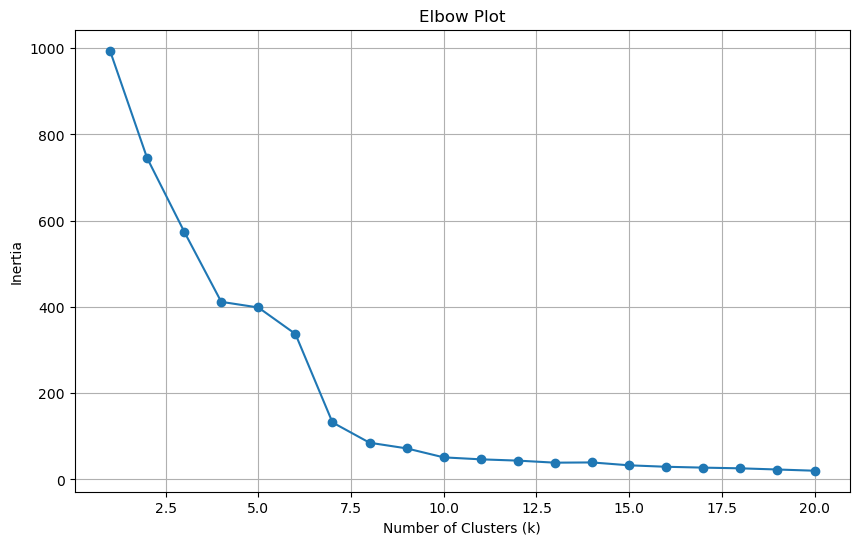

In [19]:
# Elbow Plot

inertia_list = []

for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_sc)
    inertia_list.append(kmeans.inertia_)

# Plotting the Elbow Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), inertia_list, marker='o')
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show();

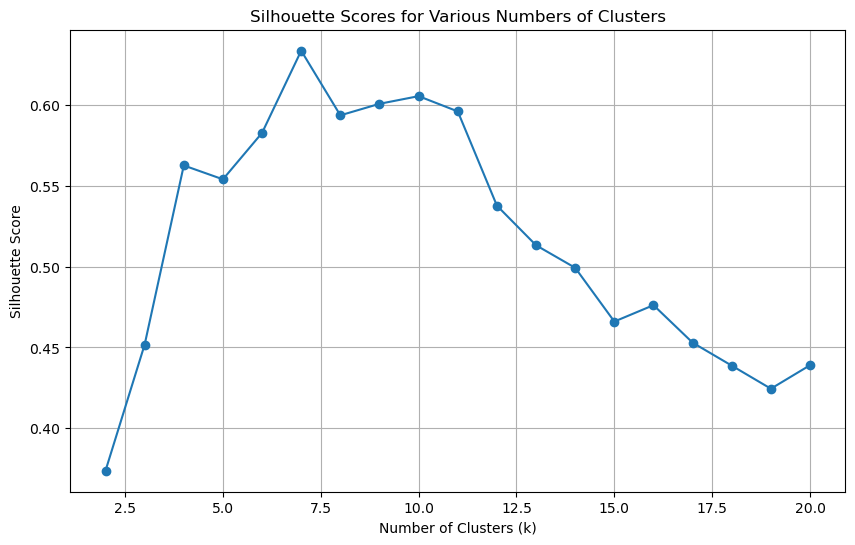

In [20]:
# Silhouette Score

silhouette_list = []

for k in range(2, 21):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_sc)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(X_sc, labels)
    silhouette_list.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 21), silhouette_list, marker='o')
plt.title('Silhouette Scores for Various Numbers of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show();

#### Based off of our metrics above, which k should we try first?

Answer Here:
At k = 4 and 6, they are elbow points and have high Silhouette scores. We will try k = 4 first.

In [23]:
# Now let's try it!

# Instantiate & Fit
kmeans = KMeans(n_clusters = 4, random_state = 42)
kmeans.fit(X_sc)

# labels
labels = kmeans.labels_

In [24]:
# Silhouette Score

silhouette = silhouette_score(X_sc, labels)
silhouette

0.5626593043305045

#### Visualize Your Clusters!

In [26]:
# Add cluster column
X_df = pd.DataFrame(X, columns=['lifeExp', 'pop', 'gdpPercap', 'continent_Americas', 'continent_Asia',
       'continent_Europe', 'continent_Oceania'])

labels_series = pd.Series(labels, name='Cluster')

X_df['Cluster'] = labels_series.values

X_df

,lifeExp,pop,gdpPercap,continent_Americas,continent_Asia,continent_Europe,continent_Oceania,Cluster
country,,,,,,,,
Afghanistan,43.82800,31889923,974.58034,0.00000,1.00000,0.00000,0.00000,2
Albania,76.42300,3600523,5937.02953,0.00000,0.00000,1.00000,0.00000,1
Algeria,72.30100,33333216,6223.36747,0.00000,0.00000,0.00000,0.00000,3
Angola,42.73100,12420476,4797.23127,0.00000,0.00000,0.00000,0.00000,3
Argentina,75.32000,40301927,12779.37964,1.00000,0.00000,0.00000,0.00000,0
...,...,...,...,...,...,...,...,...
Vietnam,74.24900,85262356,2441.57640,0.00000,1.00000,0.00000,0.00000,2
West Bank and Gaza,73.42200,4018332,3025.34980,0.00000,1.00000,0.00000,0.00000,2
"Yemen, Rep.",62.69800,22211743,2280.76991,0.00000,1.00000,0.00000,0.00000,2


In [27]:
labels_series

0      2
1      1
2      3
3      3
4      0
      ..
137    2
138    2
139    2
140    3
141    3
Name: Cluster, Length: 142, dtype: int32

In [28]:
centroids = sc.inverse_transform(kmeans.cluster_centers_)
centroids = pd.DataFrame(centroids, columns=['lifeExp', 'pop', 'gdpPercap', 'continent_Americas', 'continent_Asia',
       'continent_Europe', 'continent_Oceania'])
centroids

,lifeExp,pop,gdpPercap,continent_Americas,continent_Asia,continent_Europe,continent_Oceania
0,73.60812,35954847.36000,11003.03163,1.00000,-0.00000,0.00000,-0.00000
1,77.84053,19082764.87500,25351.71330,0.00000,-0.00000,0.93750,0.06250
2,70.72848,115513752.33333,12473.02687,0.00000,1.00000,0.00000,-0.00000
3,54.80604,17875763.30769,3089.03260,0.00000,0.00000,0.00000,0.00000


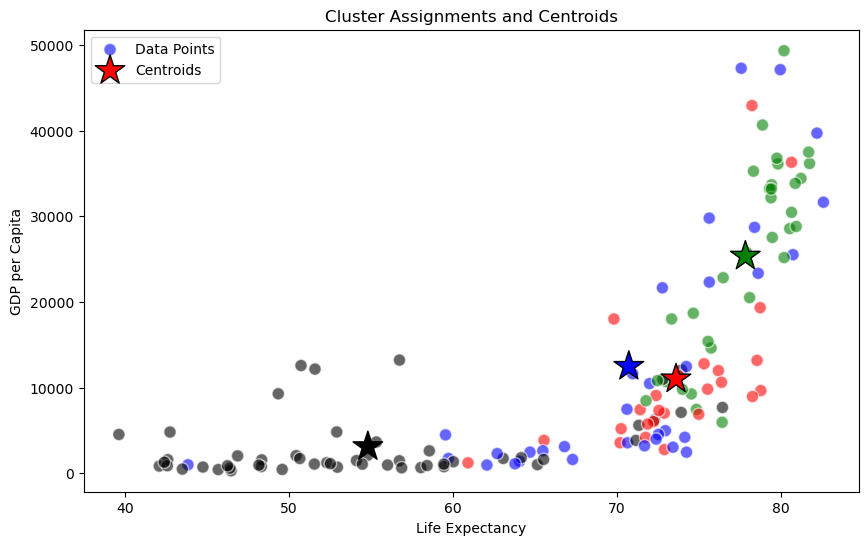

In [29]:
centroids = sc.inverse_transform(kmeans.cluster_centers_)
centroids = pd.DataFrame(centroids, columns=['lifeExp', 'pop', 'gdpPercap', 'continent_Americas', 'continent_Asia',
                                             'continent_Europe', 'continent_Oceania'])

plt.figure(figsize=(10, 6))

# Map colors for different clusters
colors = ['red', 'green', 'blue', 'black']
X_df['color'] = X_df['Cluster'].map(lambda p: colors[p])

# Plot points
plt.scatter(X_df['lifeExp'], X_df['gdpPercap'], c=X_df['color'], alpha=0.6, edgecolors='w', s=80, label='Data Points')

# Plot Centroids
plt.scatter(centroids['lifeExp'], centroids['gdpPercap'],
            c=colors,
            marker='*',
            s=500,
            edgecolors='k',
            linewidths=1,
            label='Centroids')

# Add labels and title
plt.xlabel('Life Expectancy')
plt.ylabel('GDP per Capita')
plt.title('Cluster Assignments and Centroids')
plt.legend()

# Show plot
plt.show()


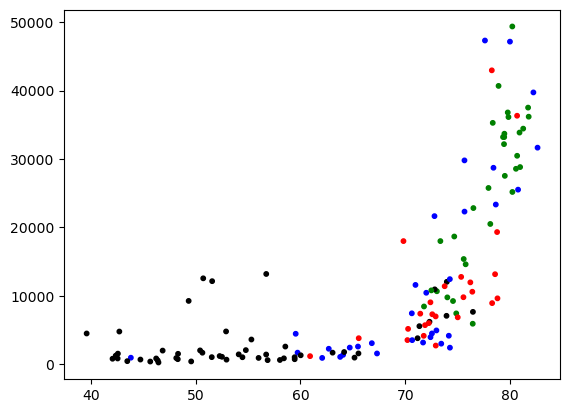

In [31]:
# Method 2: Groupby

plt.scatter(x=X_df['lifeExp'], y=X_df['gdpPercap'], c=X_df['color'], s=10);

#### An Even Closer Look...Which countries are in each of these clusters?

In [33]:
# For loop

grouped_clusters = X_df.groupby('Cluster')

for cluster, group in grouped_clusters:
    print(f"Cluster {cluster}:")
    for country in group.index:
        print(f" - {country}")
    print()


Cluster 0:
 - Argentina
 - Bolivia
 - Brazil
 - Canada
 - Chile
 - Colombia
 - Costa Rica
 - Cuba
 - Dominican Republic
 - Ecuador
 - El Salvador
 - Guatemala
 - Haiti
 - Honduras
 - Jamaica
 - Mexico
 - Nicaragua
 - Panama
 - Paraguay
 - Peru
 - Puerto Rico
 - Trinidad and Tobago
 - United States
 - Uruguay
 - Venezuela

Cluster 1:
 - Albania
 - Australia
 - Austria
 - Belgium
 - Bosnia and Herzegovina
 - Bulgaria
 - Croatia
 - Czech Republic
 - Denmark
 - Finland
 - France
 - Germany
 - Greece
 - Hungary
 - Iceland
 - Ireland
 - Italy
 - Montenegro
 - Netherlands
 - New Zealand
 - Norway
 - Poland
 - Portugal
 - Romania
 - Serbia
 - Slovak Republic
 - Slovenia
 - Spain
 - Sweden
 - Switzerland
 - Turkey
 - United Kingdom

Cluster 2:
 - Afghanistan
 - Bahrain
 - Bangladesh
 - Cambodia
 - China
 - Hong Kong, China
 - India
 - Indonesia
 - Iran
 - Iraq
 - Israel
 - Japan
 - Jordan
 - Korea, Dem. Rep.
 - Korea, Rep.
 - Kuwait
 - Lebanon
 - Malaysia
 - Mongolia
 - Myanmar
 - Nepal
 - Oman

### III. [In Groups] DBSCAN Clustering Model

- Try tuning your parameters
- Visualize your clusters
- Determine your best silhouette score
- Is this better or worse than KMeans?
- Which countries are in each cluster?

In [57]:
dbscan = DBSCAN()
dbscan.fit(X_sc)

X['DBSCAN_Cluster'] = dbscan.labels_

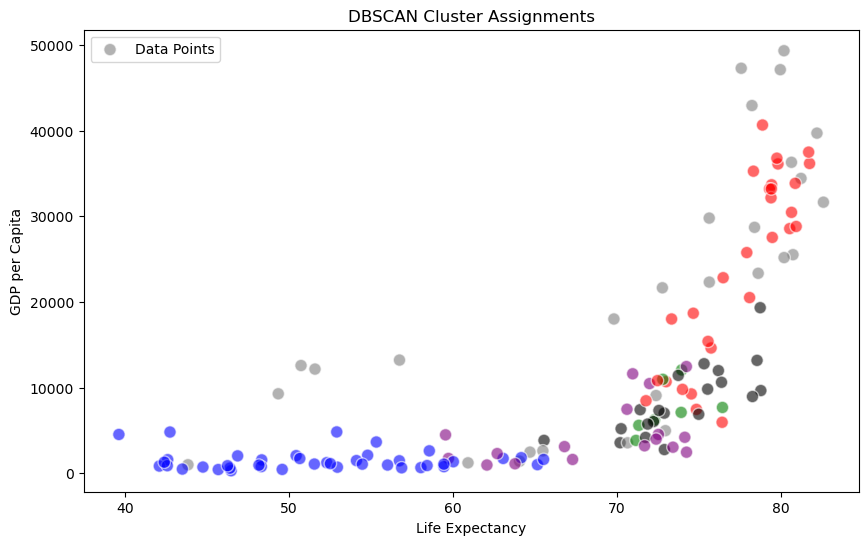

In [59]:
# Plot DBSCAN cluster assignments
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue', 'black', 'purple', 'orange', 'yellow', 'cyan']
X['color_dbscan'] = X['DBSCAN_Cluster'].map(lambda p: colors[p % len(colors)] if p != -1 else 'grey')

plt.scatter(X['lifeExp'], X['gdpPercap'], c=X['color_dbscan'], alpha=0.6, edgecolors='w', s=80)
plt.xlabel('Life Expectancy')
plt.ylabel('GDP per Capita')
plt.title('DBSCAN Cluster Assignments')
plt.legend(['Data Points'])

plt.show()

Best eps: 2, Best min_samples: 2
Best Silhouette Score: 0.6350842772929556


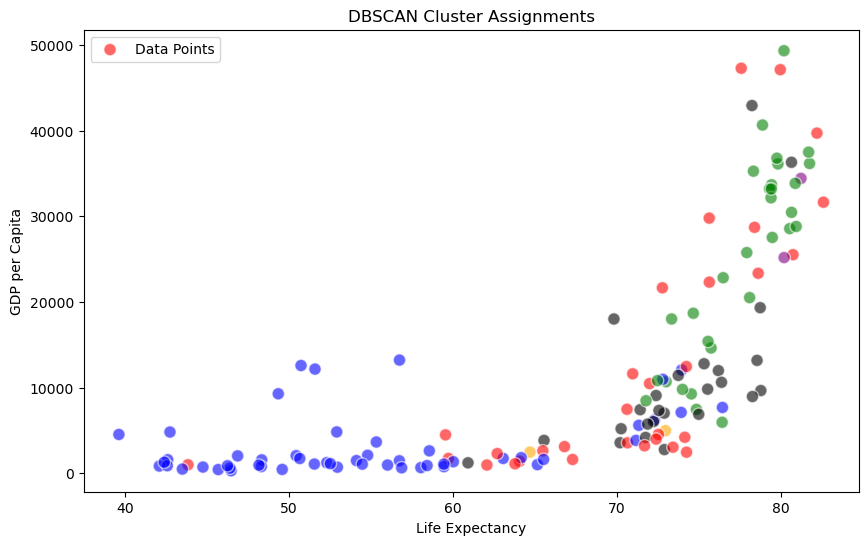

In [61]:
best_score = -1
best_eps = None
best_min_samples = None
best_dbscan = None

for eps in [0.5, 1, 1.5, 2]:
    for min_samples in [2, 3, 4, 5]:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        clusters = dbscan.fit_predict(X_sc)
        
        if len(set(clusters)) > 1:  # Only calculate silhouette score if more than one cluster is found
            score = silhouette_score(X_sc, clusters)
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples
                best_dbscan = dbscan

# Fit the best model
X['DBSCAN_Cluster'] = best_dbscan.labels_

# Print the best parameters
print(f"Best eps: {best_eps}, Best min_samples: {best_min_samples}")
print(f"Best Silhouette Score: {best_score}")

# Plot DBSCAN cluster assignments
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue', 'black', 'purple', 'orange', 'yellow', 'cyan']
X['color_dbscan'] = X['DBSCAN_Cluster'].map(lambda p: colors[p % len(colors)] if p != -1 else 'grey')

plt.scatter(X['lifeExp'], X['gdpPercap'], c=X['color_dbscan'], alpha=0.6, edgecolors='w', s=80)
plt.xlabel('Life Expectancy')
plt.ylabel('GDP per Capita')
plt.title('DBSCAN Cluster Assignments')
plt.legend(['Data Points'])

plt.show()

In [63]:
# Calculate silhouette score for KMeans
kmeans_score = silhouette_score(X_sc, kmeans.labels_)
print(f"Silhouette Score for KMeans: {kmeans_score}")

# Compare silhouette scores and determine the better clustering method
if best_score > kmeans_score:
    print("DBSCAN is better than KMeans based on the silhouette score.")
else:
    print("KMeans is better than DBSCAN based on the silhouette score.")

Silhouette Score for KMeans: 0.5626593043305045
DBSCAN is better than KMeans based on the silhouette score.


In [71]:
X

,lifeExp,pop,gdpPercap,continent_Americas,continent_Asia,continent_Europe,continent_Oceania,DBSCAN_Cluster,color_dbscan
country,,,,,,,,,
Afghanistan,43.82800,31889923,974.58034,0.00000,1.00000,0.00000,0.00000,0,red
Albania,76.42300,3600523,5937.02953,0.00000,0.00000,1.00000,0.00000,1,green
Algeria,72.30100,33333216,6223.36747,0.00000,0.00000,0.00000,0.00000,2,blue
Angola,42.73100,12420476,4797.23127,0.00000,0.00000,0.00000,0.00000,2,blue
Argentina,75.32000,40301927,12779.37964,1.00000,0.00000,0.00000,0.00000,3,black
...,...,...,...,...,...,...,...,...,...
Vietnam,74.24900,85262356,2441.57640,0.00000,1.00000,0.00000,0.00000,0,red
West Bank and Gaza,73.42200,4018332,3025.34980,0.00000,1.00000,0.00000,0.00000,0,red
"Yemen, Rep.",62.69800,22211743,2280.76991,0.00000,1.00000,0.00000,0.00000,0,red


In [75]:
# Group by DBSCAN Cluster
grouped_dbscan_clusters = X.groupby('DBSCAN_Cluster')

for cluster, group in grouped_dbscan_clusters:
    print(f"DBSCAN Cluster {cluster}:")
    for country in group.index:
        print(f" - {country}")
    print()

DBSCAN Cluster 0:
 - Afghanistan
 - Bahrain
 - Bangladesh
 - Cambodia
 - Hong Kong, China
 - Indonesia
 - Iran
 - Iraq
 - Israel
 - Japan
 - Jordan
 - Korea, Dem. Rep.
 - Korea, Rep.
 - Kuwait
 - Lebanon
 - Malaysia
 - Mongolia
 - Myanmar
 - Nepal
 - Oman
 - Pakistan
 - Philippines
 - Saudi Arabia
 - Singapore
 - Sri Lanka
 - Syria
 - Taiwan
 - Thailand
 - Vietnam
 - West Bank and Gaza
 - Yemen, Rep.

DBSCAN Cluster 1:
 - Albania
 - Austria
 - Belgium
 - Bosnia and Herzegovina
 - Bulgaria
 - Croatia
 - Czech Republic
 - Denmark
 - Finland
 - France
 - Germany
 - Greece
 - Hungary
 - Iceland
 - Ireland
 - Italy
 - Montenegro
 - Netherlands
 - Norway
 - Poland
 - Portugal
 - Romania
 - Serbia
 - Slovak Republic
 - Slovenia
 - Spain
 - Sweden
 - Switzerland
 - Turkey
 - United Kingdom

DBSCAN Cluster 2:
 - Algeria
 - Angola
 - Benin
 - Botswana
 - Burkina Faso
 - Burundi
 - Cameroon
 - Central African Republic
 - Chad
 - Comoros
 - Congo, Dem. Rep.
 - Congo, Rep.
 - Cote d'Ivoire
 - Djibo

### ⭐ There are pros & cons for both DBSCAN and K-Means Clustering Models. Again, since this is unsupervised it is not easy to know which method you should use until you dive into your data! Keep exploring and diving into your data 💫 